In [50]:
from layers import *
from synaptics import *
from visual_env import *
import numpy as np
import matplotlib.pyplot as plt
resolution = .1

In [51]:
layer0 = IzhikevichLayer(size=25, resolution=resolution, tau=30, preset='RS')
layer0.transmitter_impact = 300
layer1 = IzhikevichLayer(size=1, resolution=resolution, tau=30, preset='RS')
synapse = Synapse(layer0, layer1)

In [70]:
weights = np.zeros(25).reshape(1,25,1)
pre_v = np.zeros(25).reshape(1,25)
pre_syn = np.zeros(25).reshape(1,25)
post_v = np.zeros(1).reshape(1,1)
post_syn = np.zeros(1).reshape(1,1)
#layer0.apply_current(np.zeros(25))
#layer1.apply_current(np.zeros(1))

In [83]:
vis = retina()
pattern = np.ones(5).reshape(1,5) * 5
vis.add_object(pattern, position=[0,6])

In [86]:
t = 1000
time = int(t / resolution)
lr = .01
alpha = 5
pattern_delay = int(1 / resolution)
direction = 'up'
gather_data = True

for i in range(time):
    synapse.forward()
    picture = vis.tick(delay=pattern_delay, move_direction=direction, noize_density=.08, noize_acceleration=5, rest=int(120/resolution))
    #picture = np.zeros(25)
    layer0.apply_current(picture.flatten())
    layer1.forward()
    #synapse.STDP(learning_rate=lr, assymetry=alpha)
    if gather_data:
        weights = np.append(weights, np.array([synapse.weights]), axis=0)
        pre_v = np.append(pre_v, np.array([layer0.v]), axis=0)
        pre_syn = np.append(pre_syn, np.array([layer0.impulses]), axis=0)
        post_v = np.append(post_v, np.array([layer1.v]), axis=0)
        post_syn = np.append(post_syn, np.array([layer1.impulses]), axis=0)

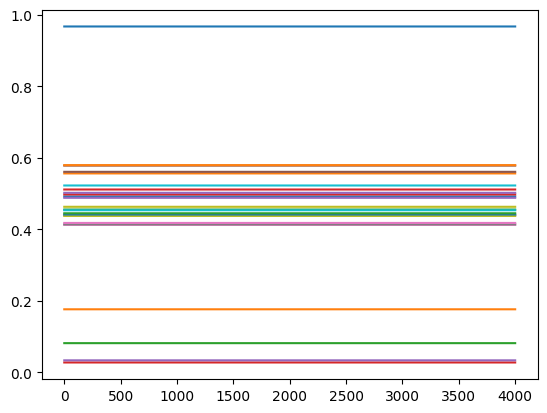

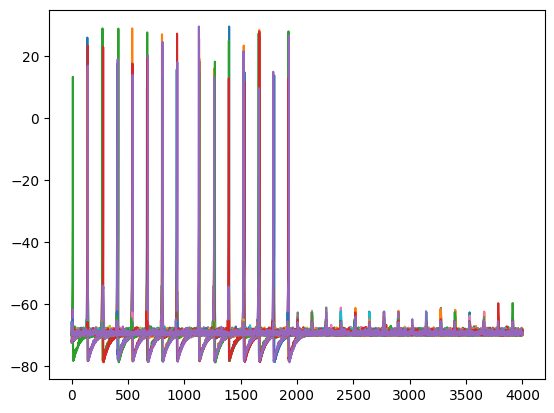

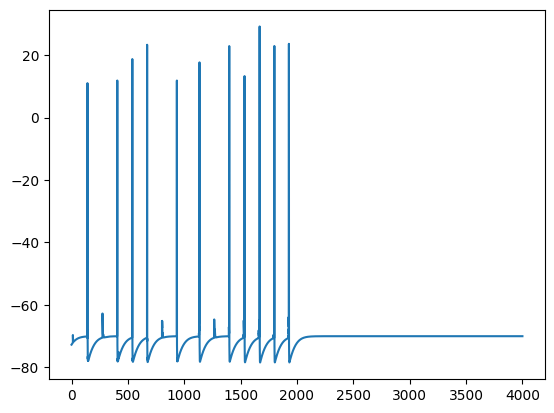

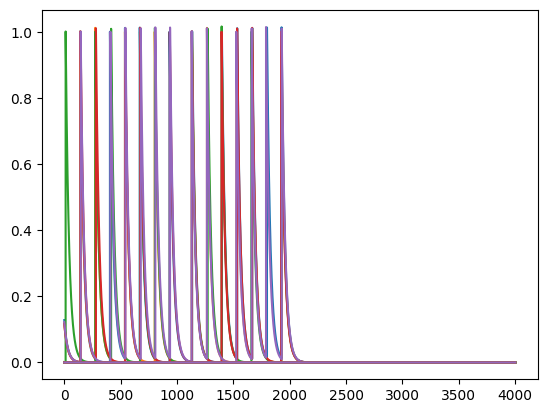

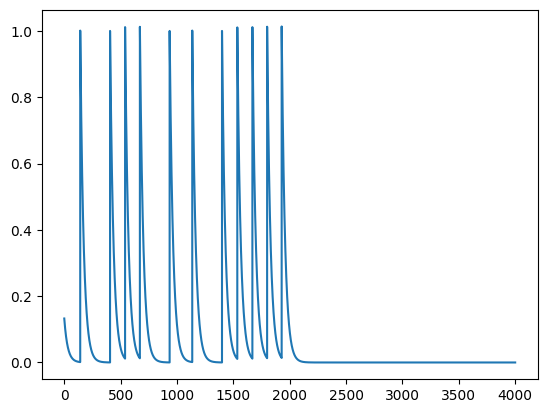

In [87]:
temp = None
x_scale = np.arange(int(weights.shape[0])) * resolution
for i in range(weights.shape[1]):
    temp = np.array(weights[:,i]).flatten()
    plt.plot(x_scale[1:], temp[1:])
plt.show()
for i in range(pre_v.shape[1]):
    temp = np.array(pre_v[:, i]).flatten()
    plt.plot(x_scale[1:], temp[1:])
plt.show()
for i in range(post_v.shape[1]):
    temp = np.array(post_v[:, i]).flatten()
    plt.plot(x_scale[1:], temp[1:])
plt.show()
for i in range(pre_syn.shape[1]):
    temp = np.array(pre_syn[:, i]).flatten()
    plt.plot(x_scale[1:], temp[1:])
plt.show()
for i in range(post_syn.shape[1]):
    temp = np.array(post_syn[:, i]).flatten()
    plt.plot(x_scale[1:], temp[1:])
plt.show()

In [81]:
vis = retina()
pattern = np.ones(5).reshape(1,5) * 10
vis.add_object(pattern, position=[1,6])


In [82]:
picture = vis.tick(delay=0, move_direction='left', noize_density=.05, noize_acceleration=50, rest=5)
print(picture)

[[10. 10. 10. 10. 10.]
 [ 0.  0. 50.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]]
